# ARIMA
Autoregressive Integrated Moving Average Model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.
This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.
A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [98]:
data = pd.read_csv('AirQualityUCI.csv', sep=';',infer_datetime_format=True)
data.head(5)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [100]:
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [101]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [102]:
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
data = data.dropna()
data.shape

(9357, 15)

In [104]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [105]:
data = data.replace(-200, np.nan)
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,8991.000000,914.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000
mean,1099.833166,218.811816,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128
std,217.080037,204.459921,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288
min,647.000000,7.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,937.000000,67.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000
50%,1063.000000,150.000000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000
75%,1231.000000,297.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [106]:
data.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64

In [107]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=9357)

In [108]:
data.loc[:,'Datetime'] = data['Date'] + ' ' + data['Time']

In [109]:
from datetime import datetime
DateTime = []
for x in data['Datetime']:
    DateTime.append(datetime.strptime(x,'%d/%m/%Y %H.%M.%S'))

In [110]:
datetime = pd.Series(DateTime)
data.index = datetime

In [111]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",10/03/2004 18.00.00
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",10/03/2004 19.00.00
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",10/03/2004 20.00.00
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",10/03/2004 21.00.00
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",10/03/2004 22.00.00


In [112]:
data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Datetime          object
dtype: object

In [113]:
data['CO(GT)'] = data['CO(GT)'].str.replace(',', '.').astype(float)
data['C6H6(GT)'] = data['C6H6(GT)'].str.replace(',','.').astype(float)
data['T'] = data['T'].str.replace(',', '.').astype(float)
data['RH'] = data['RH'].str.replace(',', '.').astype(float)
data['AH'] = data['AH'].str.replace(',', '.').astype(float)

In [114]:
data.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Datetime          object
dtype: object

In [115]:
data = data.replace(-200, np.nan)

In [116]:
S1 = data['PT08.S1(CO)'].fillna(data['PT08.S1(CO)'].mean())
S2 = data['PT08.S2(NMHC)'].fillna(data['PT08.S1(CO)'].mean())
S3 = data['PT08.S3(NOx)'].fillna(data['PT08.S1(CO)'].mean())
S4 = data['PT08.S4(NO2)'].fillna(data['PT08.S1(CO)'].mean())
S5 = data['PT08.S5(O3)'].fillna(data['PT08.S1(CO)'].mean())
S6 = data['RH'].fillna(data['PT08.S1(CO)'].mean())

In [117]:
df = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5,'S6':S6})
df.to_csv("AirQuality_processed.csv")

Text(0.5,1,'S6')

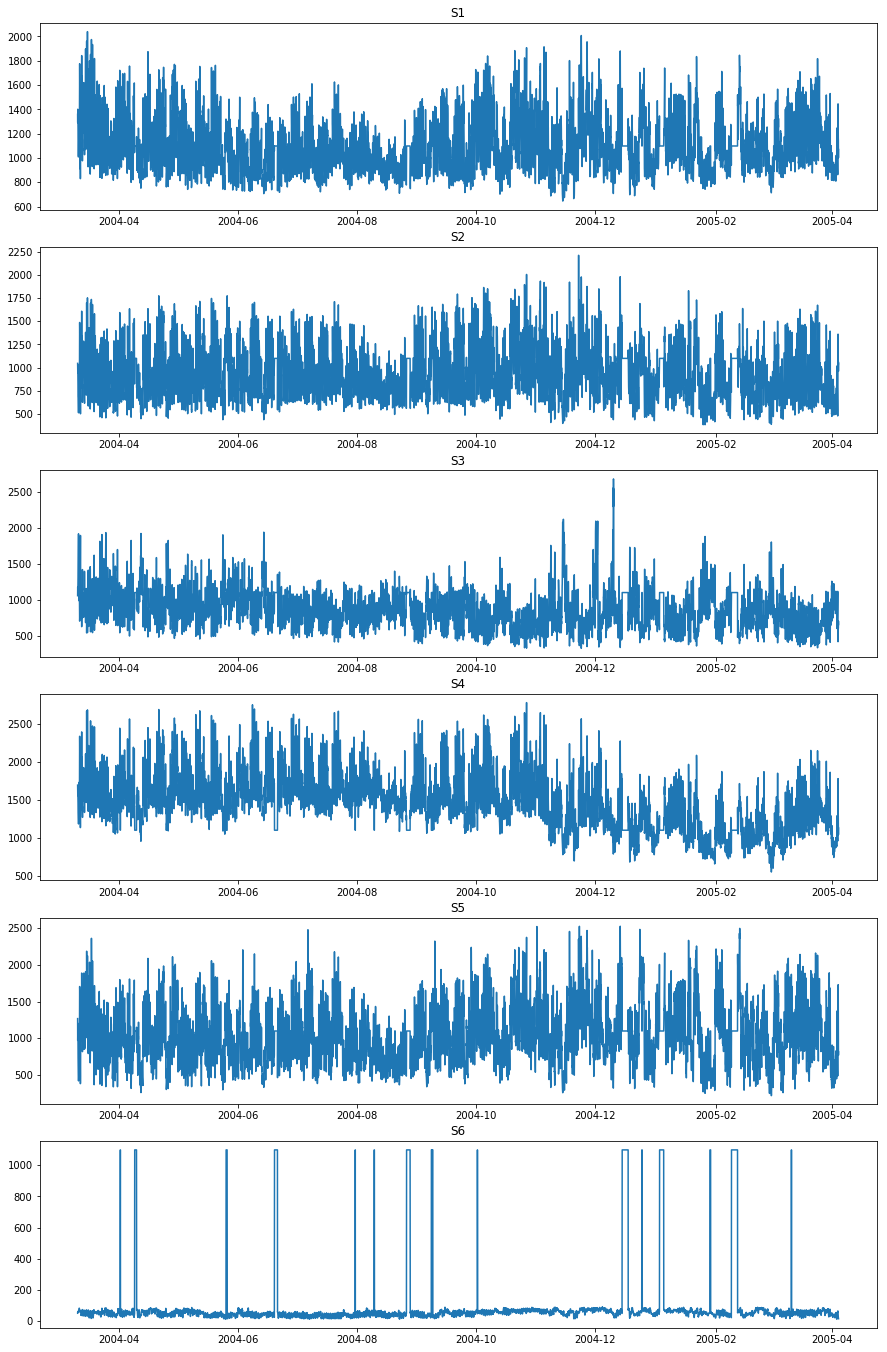

In [118]:
fig, axes = plt.subplots(6,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')
axes[5].plot(S6)
axes[5].set_title ('S6')

Text(0.5,1,'S6')

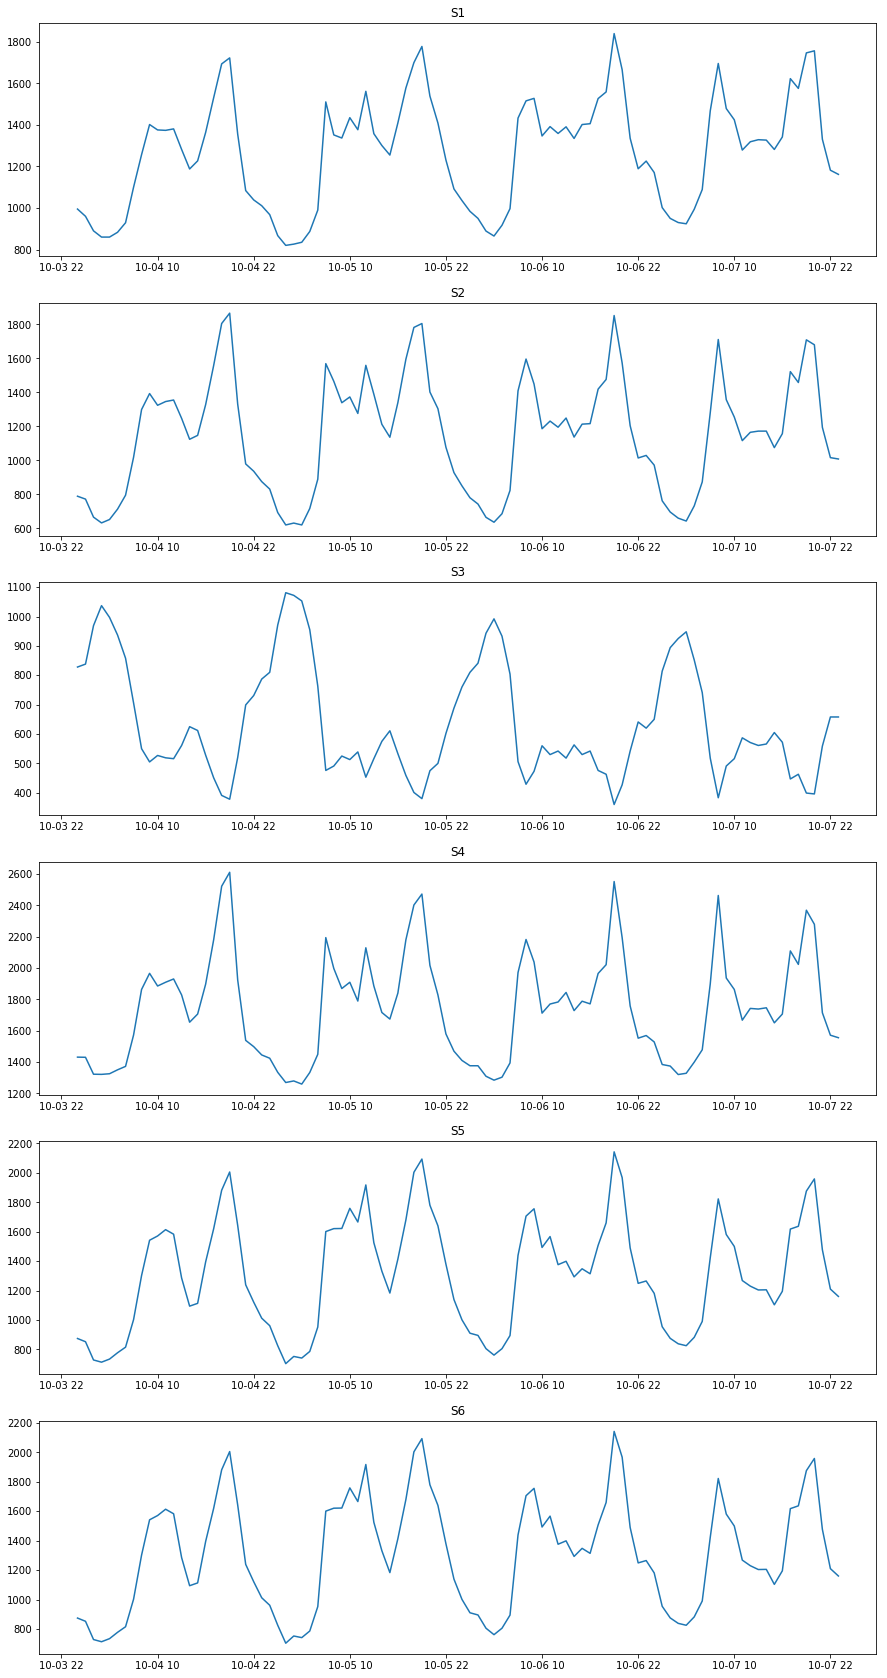

In [119]:
fig, axes = plt.subplots(6,1, figsize=(15,30))

axes[0].plot(S1['2004-10-04':'2004-10-07'])
axes[0].set_title ('S1')
axes[1].plot(S2['2004-10-04':'2004-10-07'])
axes[1].set_title ('S2')
axes[2].plot(S3['2004-10-04':'2004-10-07'])
axes[2].set_title ('S3')
axes[3].plot(S4['2004-10-04':'2004-10-07'])
axes[3].set_title ('S4')
axes[4].plot(S5['2004-10-04':'2004-10-07'])
axes[4].set_title ('S5')
axes[5].plot(S5['2004-10-04':'2004-10-07'])
axes[5].set_title ('S6')

In [120]:
df_RH = pd.DataFrame({'S6':S6})
df.to_csv("AirQuality_processed_RH.csv")
df_RH.head()

,S6
2004-03-10 18:00:00,48.9
2004-03-10 19:00:00,47.7
2004-03-10 20:00:00,54.0
2004-03-10 21:00:00,60.0
2004-03-10 22:00:00,59.6


In [121]:
df_RH.isnull().sum()

S6    0
dtype: int64

In [122]:
#Determine the rolling statistics
rolmean = df_RH.rolling(window=12).mean()
rolstd = df_RH.rolling(window=12).std()
print(rolmean,rolstd)

                            S6
2004-03-10 18:00:00        NaN
2004-03-10 19:00:00        NaN
2004-03-10 20:00:00        NaN
2004-03-10 21:00:00        NaN
2004-03-10 22:00:00        NaN
2004-03-10 23:00:00        NaN
2004-03-11 00:00:00        NaN
2004-03-11 01:00:00        NaN
2004-03-11 02:00:00        NaN
2004-03-11 03:00:00        NaN
2004-03-11 04:00:00        NaN
2004-03-11 05:00:00  56.900000
2004-03-11 06:00:00  57.666667
2004-03-11 07:00:00  58.658333
2004-03-11 08:00:00  58.941667
2004-03-11 09:00:00  58.991667
2004-03-11 10:00:00  58.891667
2004-03-11 11:00:00  58.783333
2004-03-11 12:00:00  59.616667
2004-03-11 13:00:00  60.983333
2004-03-11 14:00:00  62.766667
2004-03-11 15:00:00  64.400000
2004-03-11 16:00:00  65.291667
2004-03-11 17:00:00  66.241667
2004-03-11 18:00:00  66.750000
2004-03-11 19:00:00  67.558333
2004-03-11 20:00:00  68.425000
2004-03-11 21:00:00  68.708333
2004-03-11 22:00:00  69.125000
2004-03-11 23:00:00  69.366667
...                        ...
2005-04-

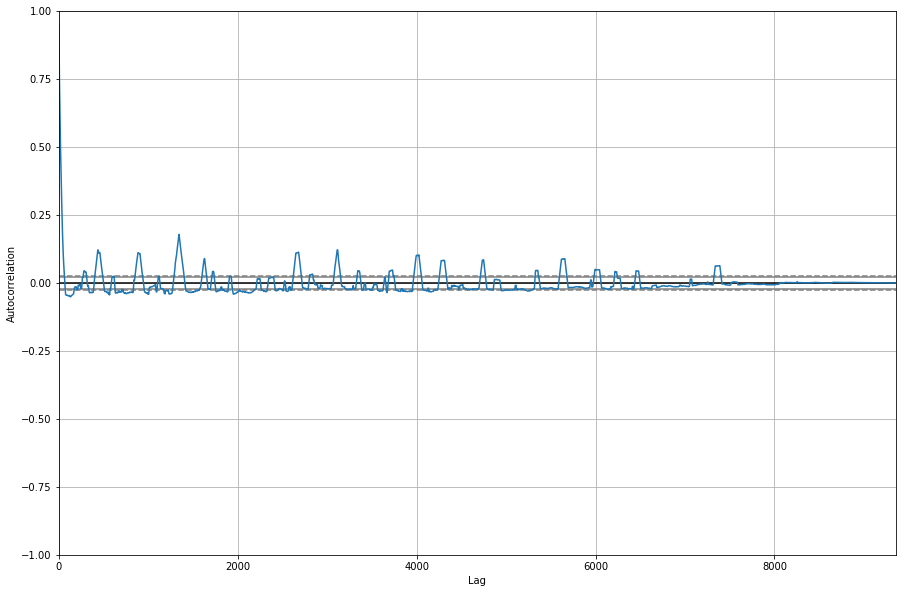

In [123]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
rcParams['figure.figsize'] = 15,10
autocorrelation_plot(df_RH)
pyplot.show()

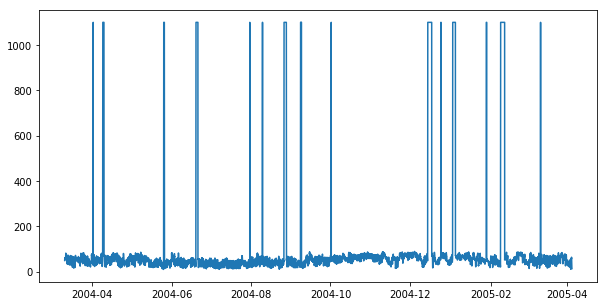

In [124]:
rcParams['figure.figsize'] = 10,5

pyplot.plot(df_RH)
pyplot.show()

In [125]:
# perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print ('Result for Dickey fuller test')
# print(indexedDataset['#Passengers'])
dftest= adfuller(df_RH['S6'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)
    

Result for Dickey fuller test
Test Statistic               -1.126821e+01
p-value                       1.560305e-20
#Lags Used                    1.400000e+01
Number of observation Used    9.342000e+03
Critical Value (1%)          -3.431050e+00
Critical Value (5%)          -2.861849e+00
Critical Value (10%)         -2.566935e+00
dtype: float64


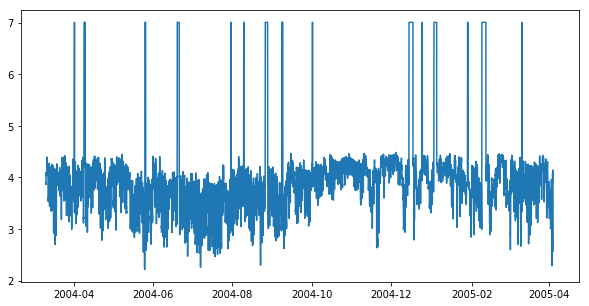

In [126]:
#Estimate trend
df_RH_logScale = np.log(df_RH)
plt.plot(df_RH_logScale)

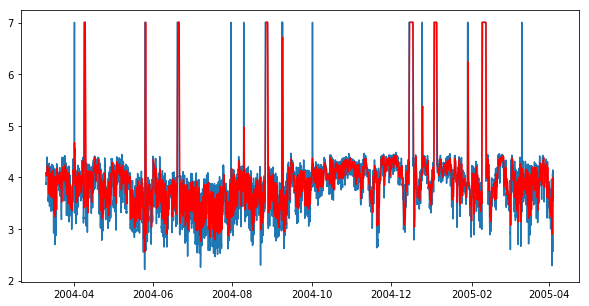

In [127]:
#MA
movingAverage = df_RH_logScale.rolling(window=12).mean()
movingStd = df_RH_logScale.rolling(window=12).std()
plt.plot(df_RH_logScale)
plt.plot(movingAverage,color='red')

In [128]:
datasetLogScaleMinusMovingAverage = df_RH_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,S6
2004-03-11 05:00:00,-0.009338
2004-03-11 06:00:00,0.009545
2004-03-11 07:00:00,0.016475
2004-03-11 08:00:00,-0.026225
2004-03-11 09:00:00,0.027196
2004-03-11 10:00:00,-0.008088
2004-03-11 11:00:00,-0.014836
2004-03-11 12:00:00,0.114636
2004-03-11 13:00:00,0.228779
2004-03-11 14:00:00,0.262950


In [129]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # Plot rolling
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Average')
    std = plt.plot(movingStd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # perform Dickey Fuller Test
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries['S6'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value    
    print(dfoutput)

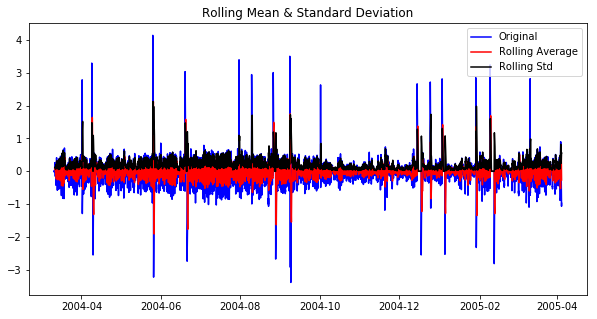

Result of Dickey Fuller Test
Test Statistic                 -19.663489
p-value                          0.000000
#Lags Used                      38.000000
Number of observation Used    9307.000000
Critical Value (1%)             -3.431053
Critical Value (5%)             -2.861851
Critical Value (10%)            -2.566935
dtype: float64


In [130]:
test_stationary(datasetLogScaleMinusMovingAverage)

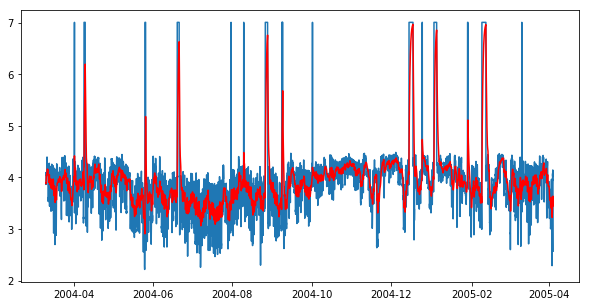

In [131]:
exponentialDecayWeightedAverage = df_RH_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_RH_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

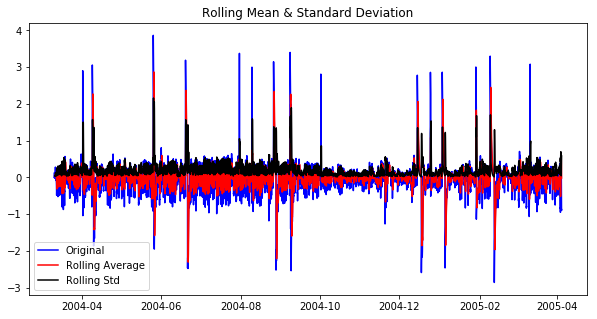

Result of Dickey Fuller Test
Test Statistic               -1.585498e+01
p-value                       9.354041e-29
#Lags Used                    3.800000e+01
Number of observation Used    9.318000e+03
Critical Value (1%)          -3.431052e+00
Critical Value (5%)          -2.861850e+00
Critical Value (10%)         -2.566935e+00
dtype: float64


In [132]:
datasetLogScaleMinusMovingExponentialDecayAverage = df_RH_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

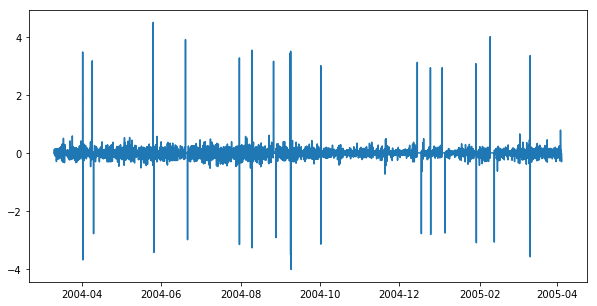

In [133]:
datasetLogDiffShifting  = df_RH_logScale-df_RH_logScale.shift()
plt.plot(datasetLogDiffShifting)

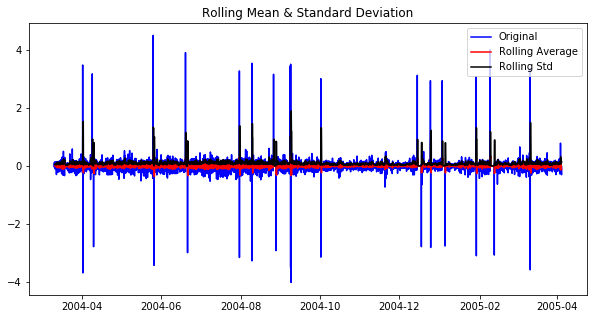

Result of Dickey Fuller Test
Test Statistic                 -19.926297
p-value                          0.000000
#Lags Used                      38.000000
Number of observation Used    9317.000000
Critical Value (1%)             -3.431052
Critical Value (5%)             -2.861850
Critical Value (10%)            -2.566935
dtype: float64


In [134]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Plotting AR Model


/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


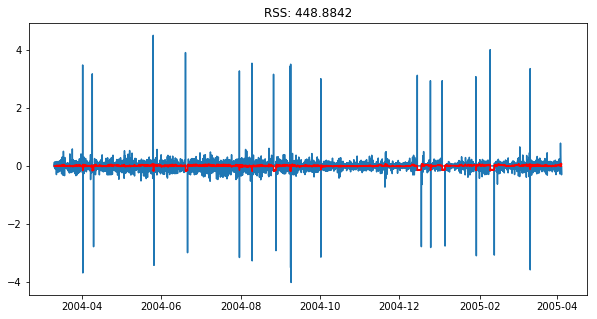

In [135]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model

model = ARIMA(df_RH_logScale,order=(2, 1, 2))

# print(model)
result_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting["S6"])**2))
print('Plotting AR Model')


/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

Plotting AR Model


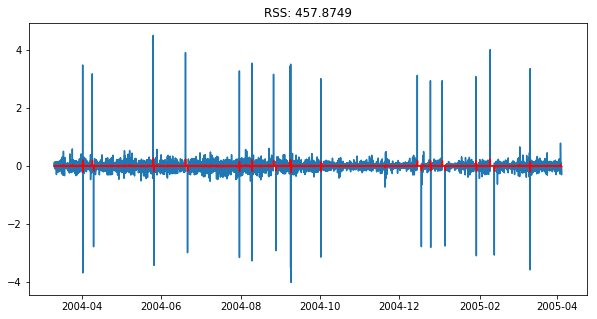

In [136]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(df_RH_logScale,order=(2, 1, 0))

# print(model)
result_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_MA.fittedvalues-datasetLogDiffShifting["S6"])**2))
print('Plotting AR Model')

/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Plotting AR Model


/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


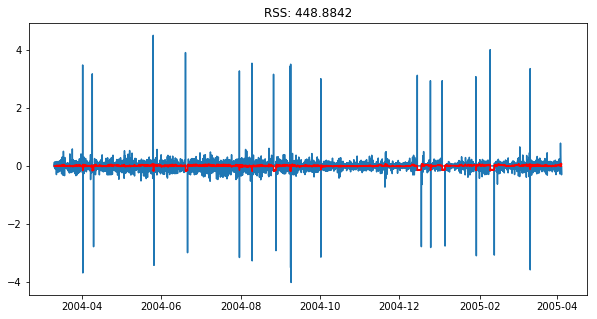

In [137]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(df_RH_logScale,order=(2, 1, 2))

# print(model)
result_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues-datasetLogDiffShifting["S6"])**2))
print('Plotting AR Model')

In [138]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

2004-03-10 19:00:00    0.000004
2004-03-10 20:00:00    0.000503
2004-03-10 21:00:00   -0.001858
2004-03-10 22:00:00   -0.005284
2004-03-10 23:00:00   -0.004720
Freq: H, dtype: float64


In [139]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

2004-03-10 19:00:00    0.000004
2004-03-10 20:00:00    0.000506
2004-03-10 21:00:00   -0.001352
2004-03-10 22:00:00   -0.006635
2004-03-10 23:00:00   -0.011355
Freq: H, dtype: float64


In [140]:
prediction_ARIMA_log = pd.Series(df_RH_logScale['S6'].ix[0], index=df_RH_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value =0)
prediction_ARIMA_log.head()

/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2004-03-10 18:00:00    3.889777
2004-03-10 19:00:00    3.889781
2004-03-10 20:00:00    3.890284
2004-03-10 21:00:00    3.888426
2004-03-10 22:00:00    3.883142
Freq: H, dtype: float64

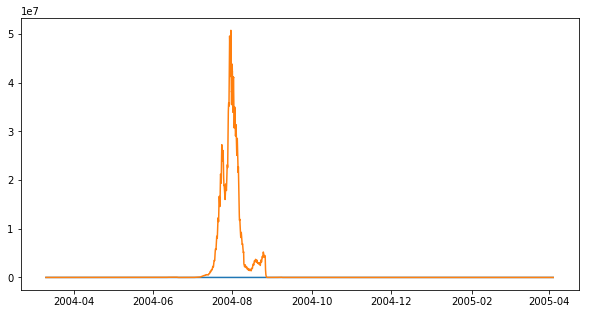

In [141]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df_RH)
plt.plot(prediction_ARIMA)

In [142]:
df_RH_logScale

,S6
2004-03-10 18:00:00,3.889777
2004-03-10 19:00:00,3.864931
2004-03-10 20:00:00,3.988984
2004-03-10 21:00:00,4.094345
2004-03-10 22:00:00,4.087656
2004-03-10 23:00:00,4.080922
2004-03-11 00:00:00,4.039536
2004-03-11 01:00:00,4.094345
2004-03-11 02:00:00,4.089332
2004-03-11 03:00:00,4.097672


/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


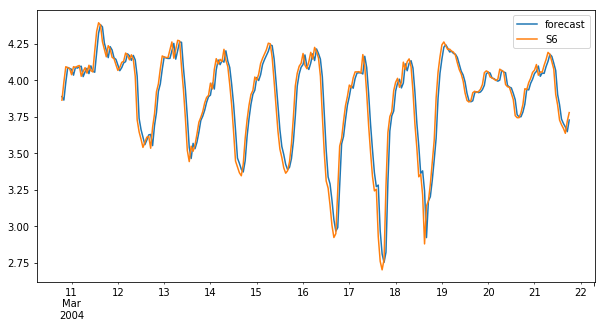

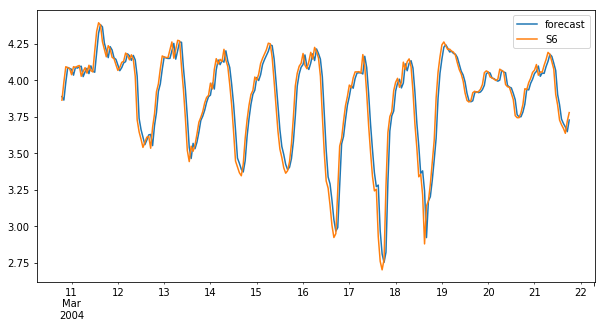

In [143]:
result_ARIMA.plot_predict(1,264)


In [144]:
print(result_ARIMA.summary().tables[1])

/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.754e-06   6.49e-05      0.058      0.954      -0.000       0.000
ar.L1.D.S6    -0.0134      0.035     -0.378      0.705      -0.083       0.056
ar.L2.D.S6     0.9173      0.034     27.015      0.000       0.851       0.984
ma.L1.D.S6    -0.0296      0.033     -0.892      0.373      -0.095       0.035
ma.L2.D.S6    -0.9679      0.033    -29.195      0.000      -1.033      -0.903
